In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial import distance

## Reading in Data

In [52]:
df = pd.read_csv("archive/data.csv")
df_artist = pd.read_csv("archive/data_by_artist.csv")
df_genres = pd.read_csv("archive/data_by_genres.csv")
df_year = pd.read_csv("archive/data_by_year.csv")
df_w_genres = pd.read_csv("archive/data_w_genres.csv")

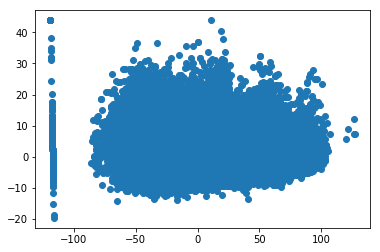

In [53]:
X = df[['acousticness', 
       'danceability',
       'energy',
       'danceability', 
       'instrumentalness', 
       'key', 
       'liveness', 
       'loudness',
       'mode', 
       'speechiness', 
       'tempo']]

pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)
plt.scatter([i[0] for i in X_2d], [i[1] for i in X_2d])


In two dimensions data is one giant blob with a left line

In [54]:
def plot_pca():
    with plt.style.context('seaborn-whitegrid'):
        plt.figure(figsize=(15, 10))
         
        plt.scatter([i[0] for i in X_2d], [i[1] for i in X_2d], c = 'b')

        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')
        #plt.legend()
        plt.title("Principal Components 1 and 2")
        plt.tight_layout()
        


In [55]:
def plot_kmeans():
    plt.plot(centers_2d[:,0], centers_2d[:,1], 'ro', label  = "centroid")

    for ind,i in zip(kmeans.labels_,centers_2d):
        #print(ind)
        
       
        #print(np.where(kmeans.labels_==ind)[0])
        class_inds=np.where(kmeans.labels_==ind)[0]
        X_class = X_2d[class_inds]

        dists = metrics.pairwise_distances([i], X_class)

        max_dist=np.max(dists)
        #print(max_dist)
        plt.gca().add_artist(plt.Circle(i, max_dist, fill=False))

Using this list of genres via https://examples.yourdictionary.com/major-types-of-music-from-around-the-world.html as "Top Music Genres In the World" : Classical, Country, Electronic dance music (EDM), Hip-hop ,Indie rock ,Jazz, K-pop, Metal, Oldies, Pop, Rap, Rhythm & blues (R&B), Rock

In [56]:
#Using 13 because that's the number of top genres described above
kmeans = KMeans(n_clusters= 13)
kmeans.fit(X)
centers = kmeans.cluster_centers_
centers_2d = pca.transform(centers)


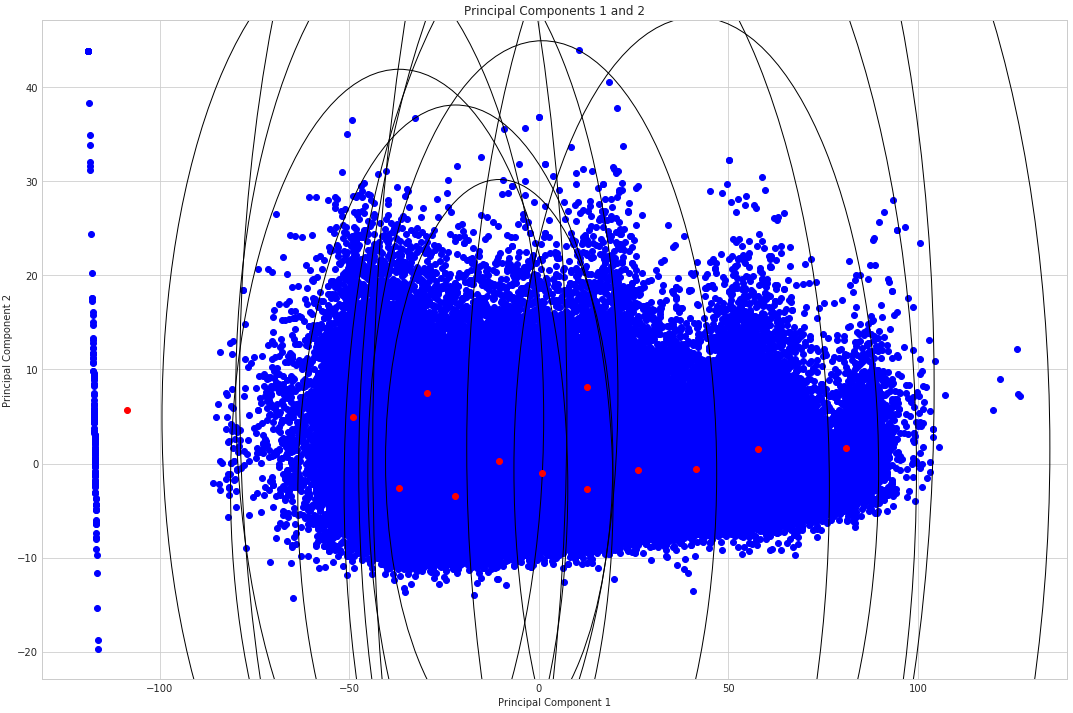

In [57]:
plot_pca()
plot_kmeans()

Visualizing our clusters in 2d space will be pretty tough if this is all correct. You can't really tell the difference between . I think this is mostly attributed to the fact that this data does not work well in a 2-dimensional space. If the data is doomed for dimension reduction then how do we visualize our clusters and try to discern genre?

What if I up the number of clusters?

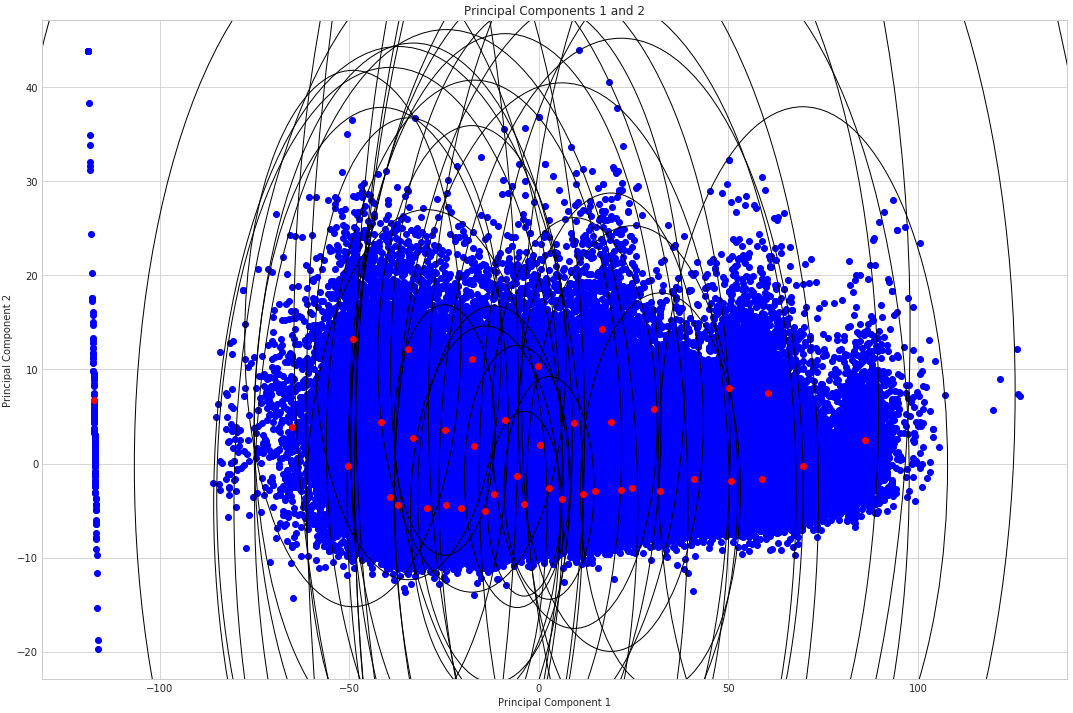

In [58]:
kmeans = KMeans(n_clusters= 40)
kmeans.fit(X)
centers = kmeans.cluster_centers_
centers_2d = pca.transform(centers)

plot_pca()
plot_kmeans()

Adding clusters doesn't do much, still getting massive circles.  Is my distance calculation correct? Also would be worth comparing circle functions to other people.

## Trying a different approach using the genre as a centroid

First we cut down our genre data to our genres of interest

In [59]:
df_genres.head()

,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
0,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.166667,5,1
1,[],0.679245,0.521473,2.298526e+05,0.401522,0.196737,0.221586,-12.679076,0.112267,112.025168,0.515920,21.682005,7,1
2,a cappella,0.621532,0.577017,1.936522e+05,0.345694,0.003799,0.127087,-12.770211,0.095324,111.813230,0.453186,43.351819,11,1
3,abstract,0.359395,0.459500,3.430185e+05,0.487000,0.791400,0.119480,-14.092000,0.043420,124.743200,0.304990,41.500000,1,1
4,abstract beats,0.353347,0.694400,2.338244e+05,0.613400,0.349403,0.102453,-6.699800,0.143453,119.398400,0.634187,58.600000,10,0


In [60]:
df_genres["genres"] = df_genres["genres"].apply(lambda x: x.replace("'", "").strip('][').split(', '))

df_genres = df_genres[[True if (len(df_genres.loc[i, "genres"]) == 1) else False for i in range(len(df_genres))]]
df_genres = df_genres.reset_index(drop = True)

In [61]:
popular_genres = ["classical", "pop", "country", "edm", "hip hop", "indie rock", "jazz", "k-pop", "metal", "oldies", "rap", "r&b", "rock"]

In [48]:
trimmed_genre_df = df_genres[[True if df_genres.loc[i,"genres"][0] in popular_genres else False for i in range(len(df_genres))]]
trimmed_genre_df.head()

,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
562,[classical],0.923837,0.316187,314582.982177,0.163788,0.576326,0.169262,-20.770300,0.054059,103.578738,0.236495,16.222614,7,1
631,[country],0.305335,0.588753,214728.878827,0.601206,0.015089,0.174485,-8.360418,0.049372,122.592254,0.566862,44.695854,7,1
871,[edm],0.114521,0.623411,233547.957598,0.755621,0.127587,0.195974,-5.716324,0.086654,125.921912,0.415068,58.104504,11,1
1166,[hip hop],0.165261,0.718704,246589.077134,0.664707,0.023867,0.214244,-7.562332,0.221819,111.720007,0.578925,49.573884,1,1
1234,[indie rock],0.231250,0.519347,243860.692456,0.663758,0.147294,0.188673,-7.714892,0.055238,123.672459,0.470674,48.376025,7,1


In [62]:


genre_X = trimmed_genre_df[['acousticness', 
       'danceability',
       'energy',
       'danceability', 
       'instrumentalness', 
       'key', 
       'liveness', 
       'loudness',
       'mode', 
       'speechiness', 
       'tempo']]

genre_y = trimmed_genre_df["genres"]
genre_2d = pca.transform(genre_X)

array([[-13.73791613,   8.83463203],
       [  5.76231744,  -2.83026155],
       [  9.19782611,  -5.43571217],
       [ -5.07078939,  -3.93547001],
       [  6.86778478,  -3.43108438],
       [ -4.48187303,   3.49474672],
       [  1.97380948,  -7.1507607 ],
       [ 11.42026609,  -3.52070826],
       [  3.10251562,  -4.43228524],
       [ -0.75737062,  -3.71324292],
       [ -0.64344484,  -3.97260802],
       [  7.84294198,  -3.03008687]])

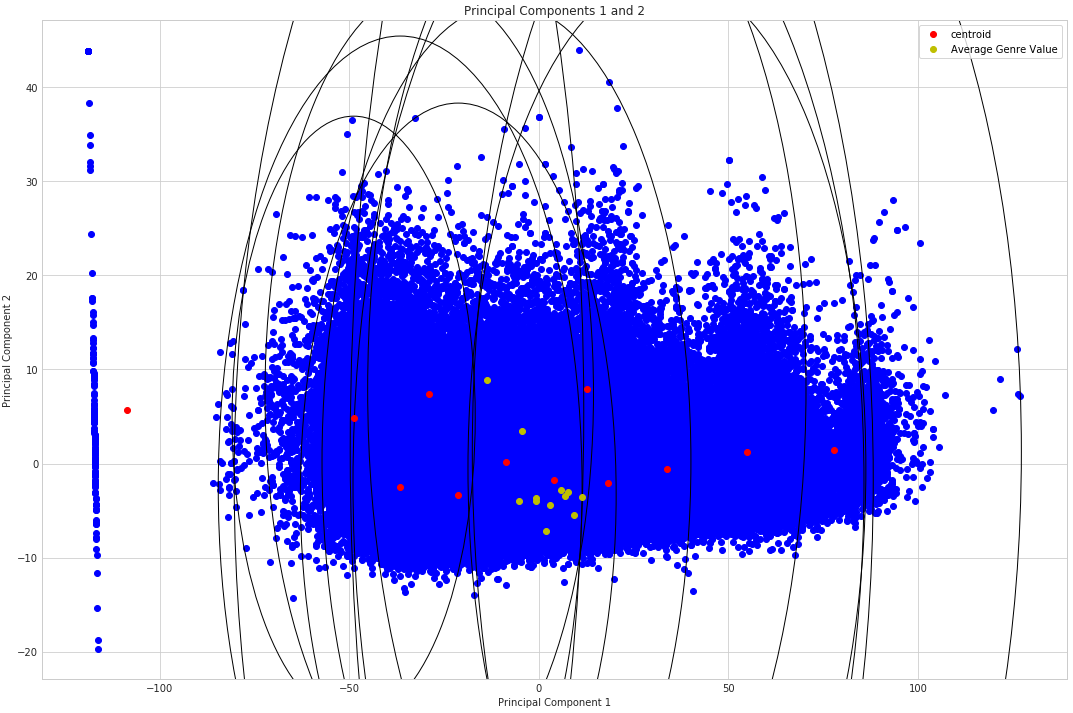

In [81]:
kmeans = KMeans(n_clusters= 12)
kmeans.fit(X)
centers = kmeans.cluster_centers_
centers_2d = pca.transform(centers)
plot_pca()
plot_kmeans()
plt.plot()
plt.plot(genre_2d[:,0], genre_2d[:,1], 'yo', label  = "Average Genre Value")
plt.legend()

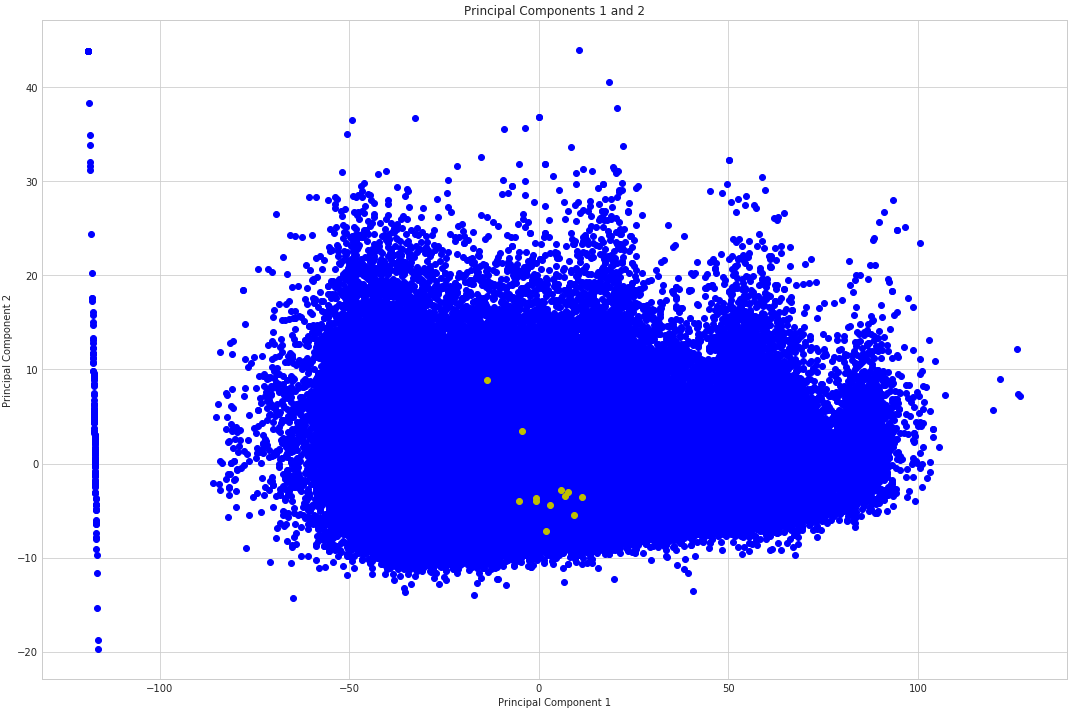

In [82]:
plot_pca()
plt.plot(genre_2d[:,0], genre_2d[:,1], 'yo', label  = "Average Genre Value")


We can't visualize this very well in 2 dimensions, as these are values we can attribute to cluster centers and they are not clearly seperable. Additionally this data is at the song level 

In [83]:
centers = kmeans.cluster_centers_

What I'm trying to do is give a name to each cluster center by attributing it to the nearest euclidean distance of our genres we want to learn from.

In [80]:
print(len(centers))
print(len(genre_X))

13
12


In [86]:
centers[0]

array([  0.55369965,   0.50236329,   0.4511192 ,   0.50236329,
         0.1254756 ,   5.20523823,   0.21236207, -10.31560212,
         0.71290053,   0.0965366 ,  80.33208727])

In [84]:
genre_X.iloc[0].values

array([ 9.23837226e-01,  3.16187146e-01,  1.63787641e-01,  3.16187146e-01,
        5.76325588e-01,  7.00000000e+00,  1.69262254e-01, -2.07702998e+01,
        1.00000000e+00,  5.40593228e-02,  1.03578738e+02])

In [87]:
`distance.euclidean(centers[0], genre_X.iloc[0].values)

25.563780351416977

In [94]:
type(genre_y)

pandas.core.series.Series

Trying to see which genres are most similar to the clusters we are dealing with

In [95]:
center_genre_names = []
for center in centers:
    
    min_dist = 1000000000
    min_genre = ""
    for i in range(len(genre_X)):
        genre = genre_y.values[i]
        row = genre_X.iloc[i]
        dist = distance.euclidean(row.values, center)
        if dist < min_dist:
            min_dist = dist
            min_genre = genre
    center_genre_names.append(min_genre)
            
    
center_genre_names

[['classical'],
 ['metal'],
 ['metal'],
 ['metal'],
 ['country'],
 ['classical'],
 ['metal'],
 ['classical'],
 ['classical'],
 ['classical'],
 ['jazz'],
 ['metal']]

Well it looks like our clusters get most focused around these genres, meaning they aren't picking up on any underlying patterns in the data. It is also possible that these underlying patterns don't exist, perhaps we can learn more by looking at supervised clustering (Isaac's work)